## N-GRAMS

### 1. Cargar librerías

In [1]:
# natural language processing: n-gram ranking
import re
import unicodedata
import nltk
import pandas as pd
from nltk.corpus import stopwords
import emoji as emoji
import matplotlib.pyplot as plt

### 2. Base de datos

In [2]:
# Base de datos
PAISES_TWEEPY_DISTINCT_ES_DIST = pd.read_csv(r'C:\Users\jilli\Desktop\TFM\2\PAISES_TWEEPY_DISTINCT_ES_DIST.csv')

In [3]:
# Agregar columna "clean_text" en donde se realizará la limpieza de los tweets
Nube=PAISES_TWEEPY_DISTINCT_ES_DIST
Nube["clean_text"]=Nube["Text"].to_numpy()

In [4]:
#Funciones de limpieza

def removeURLs(str):
    return re.sub(r'https?://\S+','',str)
def strip_emoji(text):
    new_text = re.sub(emoji.get_emoji_regexp(), r"", text)
    return new_text
def remove_user(str):
    return re.sub(r'@\S+','',str)
def punct_re_regex(s):     ##del profesor
    return re.sub(r'[^\w\s]',' ',s)    
def remove_digits(input_text):
    return re.sub('\d+', '', input_text)
def remove_spaces(text):   #remueve espacios
    return re.sub(r' +',' ',text)
def remove_cant_char(str):
    return re.sub(r'\b\w{1,2}\b','',str)

In [5]:
# aplicar funciones de limpieza
Nube['clean_text']=Nube['clean_text'].str.lower()
Nube["clean_text"]=Nube["clean_text"].apply(lambda tweet: removeURLs(tweet))
Nube["clean_text"]=Nube["clean_text"].apply(lambda tweet: strip_emoji(tweet))
Nube["clean_text"]=Nube["clean_text"].apply(lambda tweet: remove_user(tweet))
Nube["clean_text"]=Nube["clean_text"].apply(lambda tweet: punct_re_regex(tweet))
Nube["clean_text"]=Nube["clean_text"].apply(lambda tweet: remove_digits(tweet))
Nube['clean_text']=Nube['clean_text'].str.replace("_", "")
Nube["clean_text"]=Nube["clean_text"].apply(lambda tweet: remove_spaces(tweet))
Nube['clean_text']=Nube['clean_text'].str.strip()

In [6]:
Nube['clean_text']=Nube['clean_text'].str.findall('\w{2,}').str.join(' ')

In [7]:
# conteo de cantidad de palabras
texto2 = " ".join(review for review in Nube.clean_text)
print ("There are {} words in the combination of all review.".format(len(texto2)))

There are 56355553 words in the combination of all review.


In [8]:
# se extraen los stopwords
spanish_stopwords = stopwords.words('spanish')   ##para quitar las stopwords
spanish_stopwords.extend(['así','decir','sé','ir','ud','mierda','ademas','etc','además','pueden','dos','mese','cosa','gran','tan','puede','vez','creo','deben','dia','viru','vo','acá','dice','xq','mese','what','aún','día','hizo','debe','sigue','mismo','pasa','vo','fa','luego','alguien','cada','sino','','User','ma','aquí','mientras','vamo','ahí','sabe','sido','tener','meno','mientra','pue','pues','da','hacen','van','después','tbt','URL','va','mts','x','día','ser','ver','hace','hoy''ahora','solo','toda','at','q','juncal','mas','nunca','cómo','si','sí','hacer','hoy','sólo'])
NubeSinStop = Nube
NubeSinStop['clean_text'] = NubeSinStop['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (spanish_stopwords)]))

In [9]:
# se filtra un usuario porque escribe siempre lo mismo (propaganda)
NubeSinStop= NubeSinStop[NubeSinStop.Tweet_User!='colorsonline1']
NubeSinStop[1:2]

,Tweet_Id,Tweet_User_Id,Tweet_User,Text,Retweets,Favorites,Replies,Datetime,hashtags,Pais,Tweet_Source,lang,clean_text
1,1300264361466920960,85148912,jocaritomb,"Día 166 #cuarentena ... Ya sé que se acabó, qu...",0,0,0,2020-08-31 02:49:16+00:00,#cuarentena,Col,Instagram,es,cuarentena acabó puedo salir prefiero seguir a...


In [10]:
bb = " ".join(review for review in Nube.clean_text)
words=bb.split()

### 3. Elaboración de gráficos

### 3.1 unigramas

In [17]:
unigrams_series = (pd.Series(nltk.ngrams(words, 1)).value_counts())[:12]

In [18]:
unigrams_series.to_csv('unigram.csv', header=True, index=True, encoding='utf-8-sig')

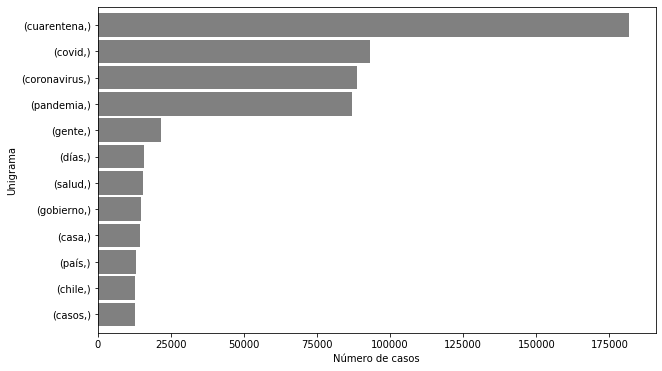

In [234]:
unigrams_series.sort_values().plot.barh(color='gray', width=.9, figsize=(10, 6))
plt.ylabel('Unigrama')
plt.xlabel('Número de casos')
plt.savefig('Unigrama.png',dpi=400)
plt.show()

In [23]:
#(pd.Series(nltk.ngrams(words, 1)).value_counts())[:300]

### 3.2 Bigramas

In [21]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:12]

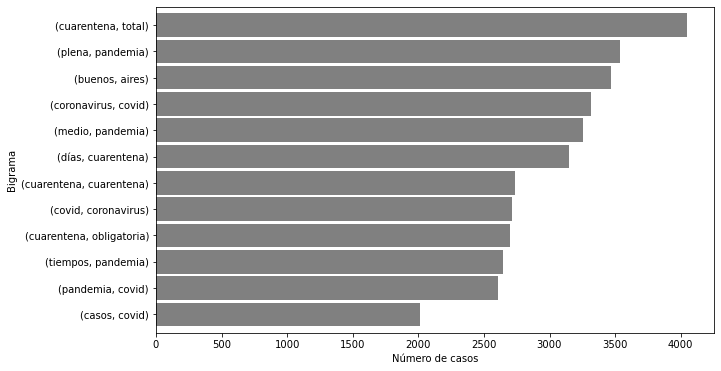

In [22]:
bigrams_series.sort_values().plot.barh(color='gray', width=.9, figsize=(10, 6))
plt.ylabel('Bigrama')
plt.xlabel('Número de casos')
plt.savefig('bigrama.png',dpi=400)
plt.show()

### 3.3 Trigramas

In [ ]:
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:12]

In [ ]:
trigrams_series.sort_values().plot.barh(color='gray', width=.9, figsize=(10, 6))
plt.ylabel('Trigrama')
plt.xlabel('Número de casos')
plt.savefig('Trigrama.png',dpi=400)
plt.show()

In [92]:
cuatrigrams_series = (pd.Series(nltk.ngrams(words, 4)).value_counts())[:12]

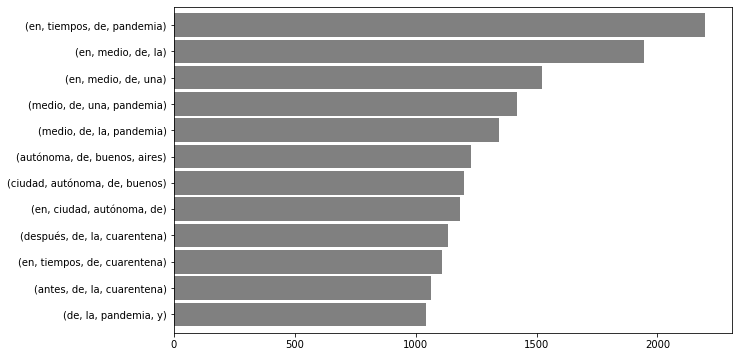

In [93]:
cuatrigrams_series.sort_values().plot.barh(color='gray', width=.9, figsize=(10, 6))

In [50]:
cuatrigrams_series

(ciudad, autónoma, buenos, aires)                                   1188
(cuarentena, ciudad, autónoma, buenos)                               164
(bbc, news, mundo, coronavirus)                                      163
(almacenamiento, suministro, impresora, oficina)                     160
(debido, situación, global, covid)                                   160
(suministro, impresora, oficina, debido)                             160
(colors, on, line, tecnologia)                                       160
(accesorioscomputadores, almacenamiento, suministro, impresora)      160
(on, line, tecnologia, accesorioscomputadores)                       160
(global, covid, atributo, seguridad)                                 160
(line, tecnologia, accesorioscomputadores, almacenamiento)           160
(tecnologia, accesorioscomputadores, almacenamiento, suministro)     160
dtype: int64